In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.path import Path
from matplotlib.patches import Circle, ConnectionPatch
import numpy as np
import time
from collections import deque, defaultdict
import math
from networkx.drawing.nx_agraph import graphviz_layout

## Argumentation Network

In [2]:
Graph = nx.nx_agraph.read_dot('./Dataset/devonshiredebate_withclusters.dot/devonshiredebate_withclusters.dot')
edge_list =[]
for e in Graph.edges():
    u,v = e
    edge_list.append((u,v))

node_list = []
for i in Graph.nodes():
    node_list.append(i)
    
print(len(edge_list))
print(len(node_list))

1015
335


### I imported fruchterman_reingold function from step3 

In [33]:
# import import_ipynb
from step3 import fruchterman_reingold

## Defining two subgraphs as mentioned in step 5 description 

In [34]:
cluster1_nodes = [
    "n64", "n66", "n106", "n137", "n138", "n139", "n140", "n141", "n142", 
    "n143", "n144", "n145", "n146", "n147", "n148", "n149", "n249", "n250", 
    "n251", "n252", "n253", "n254", "n255", "n256", "n257", "n258", "n259", 
    "n260", "n261", "n262", "n263", "n264", "n265", "n266", "n267", "n268", 
    "n269", "n270", "n271", "n272", "n273", "n274", "n275", "n276", "n277", 
    "n278", "n279", "n280", "n281", "n282", "n283", "n284", "n285", "n286", 
    "n287", "n288", "n289", "n290", "n291", "n292", "n293", "n294", "n295", "n296"
] # Youngest Devonian Strata
cluster2_nodes = [
    "n150", "n151", "n152", "n153", "n154", "n297", "n298", "n299", "n300",
    "n301", "n302", "n303", "n304", "n305", "n306", "n307", "n308", "n309",
    "n310", "n311", "n312", "n313", "n314", "n315", "n316", "n317", "n318",
    "n319", "n320", "n321", "n322", "n323", "n324", "n325", "n326", "n327",
    "n328", "n329", "n330", "n331", "n332", "n333", "n334"
]#Gap in the Sequence of Devonshi

subgraph1 = Graph.subgraph(cluster1_nodes) 
subgraph2 = Graph.subgraph(cluster2_nodes)


pos1 = fruchterman_reingold(subgraph1, positions=None, K=100, epsilon=1e-4, delta=0.2, area=240*240, c=2)
pos2 = fruchterman_reingold(subgraph2, positions=None, K=100, epsilon=1e-4, delta=0.2, area=240*240, c=2)

# Calculate the bounding boxes for each layout
bbox1 = (min([pos[0] for pos in pos1.values()]), min([pos[1] for pos in pos1.values()]),
         max([pos[0] for pos in pos1.values()]), max([pos[1] for pos in pos1.values()]))
bbox2 = (min([pos[0] for pos in pos2.values()]), min([pos[1] for pos in pos2.values()]),
         max([pos[0] for pos in pos2.values()]), max([pos[1] for pos in pos2.values()]))


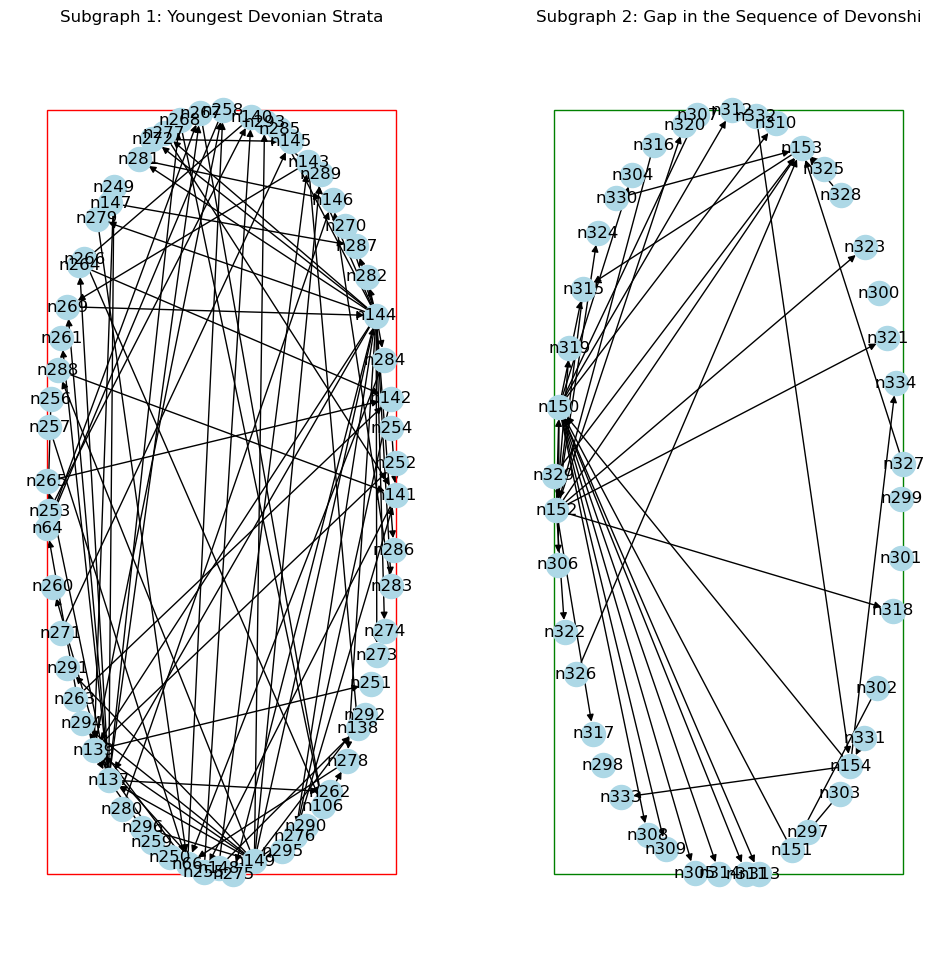

In [35]:
plt.figure(figsize=(12, 12))

plt.subplot(121)
nx.draw(subgraph1, pos1, with_labels=True, node_size=300, node_color='lightblue')

rect1 = patches.Rectangle((bbox1[0], bbox1[1]), bbox1[2] - bbox1[0], bbox1[3] - bbox1[1],
                          linewidth=1, edgecolor='r', facecolor='none')
plt.gca().add_patch(rect1)
plt.title('Subgraph 1: Youngest Devonian Strata')


plt.subplot(122)
nx.draw(subgraph2, pos2, with_labels=True, node_size=300, node_color='lightblue')

rect2 = patches.Rectangle((bbox2[0], bbox2[1]), bbox2[2] - bbox2[0], bbox2[3] - bbox2[1],
                          linewidth=1, edgecolor='g', facecolor='none')
plt.gca().add_patch(rect2)
plt.title('Subgraph 2: Gap in the Sequence of Devonshi')

plt.show()


In [6]:
# inter-cluster edges
inter_cluster_edges = [(u, v) for u, v in Graph.edges() if u in cluster1_nodes and v in cluster2_nodes]
print(inter_cluster_edges)

[('n66', 'n303'), ('n66', 'n332'), ('n137', 'n304'), ('n137', 'n305'), ('n137', 'n306'), ('n137', 'n307'), ('n137', 'n308'), ('n137', 'n309'), ('n137', 'n310'), ('n137', 'n311'), ('n137', 'n312'), ('n137', 'n313'), ('n137', 'n314'), ('n139', 'n302'), ('n139', 'n303'), ('n144', 'n316'), ('n144', 'n325'), ('n144', 'n326'), ('n144', 'n327'), ('n144', 'n328'), ('n144', 'n329'), ('n144', 'n330'), ('n149', 'n331'), ('n149', 'n332')]


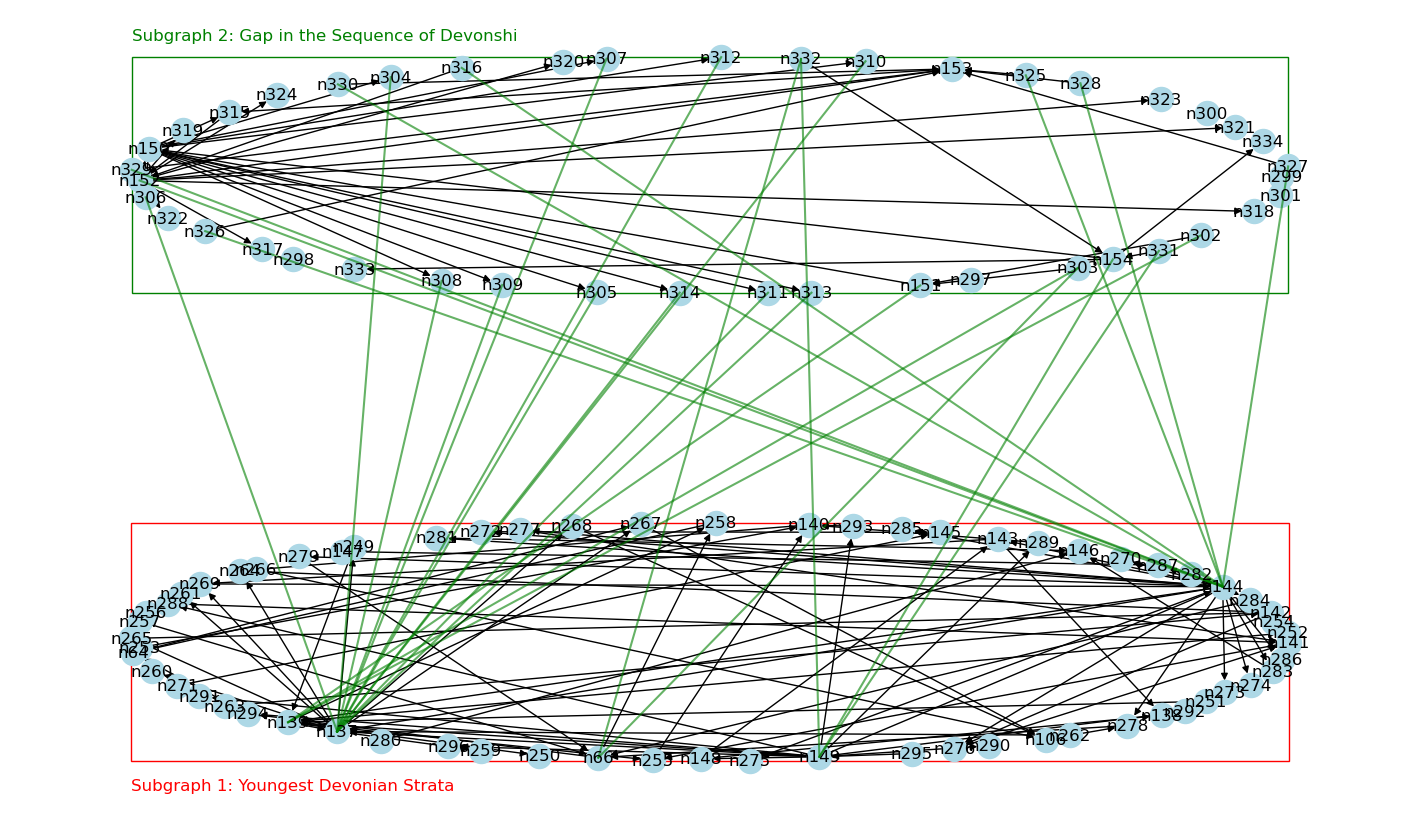

In [48]:
plt.figure(figsize=(14, 8))

#positions of subgraph2 to be above subgraph1 on the plot
shifted_pos2 = {node: (x, y + 80) for node, (x, y) in pos2.items()}  

nx.draw(subgraph1, pos1, with_labels=True, node_size=300, node_color='lightblue', edge_color='black')


nx.draw(subgraph2, shifted_pos2, with_labels=True, node_size=300, node_color='lightblue', edge_color='black')

# bounding boxes for subgraph1
bbox1 = patches.Rectangle((min(x for x, y in pos1.values()), min(y for x, y in pos1.values())),
                          max(x for x, y in pos1.values()) - min(x for x, y in pos1.values()),
                          max(y for x, y in pos1.values()) - min(y for x, y in pos1.values()),
                          linewidth=1, edgecolor='red', facecolor='none')
plt.gca().add_patch(bbox1)


#bounding boxes for subgraph2
bbox2 = patches.Rectangle((min(x for x, y in shifted_pos2.values()), min(y for x, y in shifted_pos2.values())),
                          max(x for x, y in shifted_pos2.values()) - min(x for x, y in shifted_pos2.values()),
                          max(y for x, y in shifted_pos2.values()) - min(y for x, y in shifted_pos2.values()),
                          linewidth=1, edgecolor='green', facecolor='none')
plt.gca().add_patch(bbox2)


title_pos1 = (min(x for x, y in pos1.values()), min(y for x, y in pos1.values()) - 5)  # Below subgraph1
title_pos2 = (min(x for x, y in shifted_pos2.values()), max(y for x, y in shifted_pos2.values()) + 3)  # Above subgraph2

plt.text(title_pos1[0], title_pos1[1], 'Subgraph 1: Youngest Devonian Strata', fontsize=12, color='red')
plt.text(title_pos2[0], title_pos2[1], 'Subgraph 2: Gap in the Sequence of Devonshi', fontsize=12, color='green')

#inter-cluster edges
inter_cluster_edge_positions = {}
for u, v in Graph.edges():
    if u in cluster1_nodes and v in cluster2_nodes:
        if u in pos1 and v in shifted_pos2:
            plt.plot([pos1[u][0], shifted_pos2[v][0]], [pos1[u][1], shifted_pos2[v][1]], color='green', alpha=0.6)
            inter_cluster_edge_positions[(u, v)] = (pos1[u], shifted_pos2[v])
    elif v in cluster1_nodes and u in cluster2_nodes:
        if v in pos1 and u in shifted_pos2:
            plt.plot([shifted_pos2[u][0], pos1[v][0]], [shifted_pos2[u][1], pos1[v][1]], color='green', alpha=0.6)
            inter_cluster_edge_positions[(u, v)] = (shifted_pos2[u] , pos1[v])

            
plt.axis('off')
plt.show()




## Compatibility Functions

In [116]:
def angle_compatibility(P, Q):

    # Convert to vectors
    P_vector = np.array(P[1]) - np.array(P[0])
    Q_vector = np.array(Q[1]) - np.array(Q[0])


    dot_product = np.dot(P_vector, Q_vector)

    norm_P = np.linalg.norm(P_vector)

    norm_Q = np.linalg.norm(Q_vector)

    cos_alpha = dot_product / (norm_P * norm_Q)

    Ca = abs(cos_alpha)

    return Ca

def scale_compatibility(P, Q):
    
    # edge lengths
    length_P = np.linalg.norm(np.array(P[1]) - np.array(P[0]))
    length_Q = np.linalg.norm(np.array(Q[1]) - np.array(Q[0]))
    
    avg_length = (length_P + length_Q) / 2
    
#     Cs = 2 / (avg_length*min(length_P, length_Q) + max(length_P, length_Q)/avg_length)
    Cs = 1 / (max(length_P, length_Q)/min(length_P, length_Q))
    
    return Cs

def distance_compatibility(P, Q):
    P_m = (np.array(P[1]) + np.array(P[0]))/2
    Q_m = (np.array(Q[1]) + np.array(Q[0]))/2
    
    length_P = np.linalg.norm(np.array(P[1]) - np.array(P[0]))
    length_Q = np.linalg.norm(np.array(Q[1]) - np.array(Q[0]))
    avg_length = (length_P + length_Q) / 2
    
    Cp = avg_length/(avg_length + np.linalg.norm(P_m - Q_m))
    return Cp
    
    
def project_point_onto_line(point, line_start, line_end):
    line_vec = line_end - line_start
    point_vec = point - line_start
    line_len = np.linalg.norm(line_vec)
    line_unitvec = line_vec / line_len
    projection_length = np.dot(point_vec, line_unitvec)
    return line_start + projection_length * line_unitvec

def visibility_compatibility(P, Q):
    P_m = (np.array(P[1]) + np.array(P[0]))/2
    Q_m = (np.array(Q[1]) + np.array(Q[0]))/2

    I_0 = project_point_onto_line(np.array(Q[0]), np.array(P[0]), np.array(P[1]))
    I_1 = project_point_onto_line(np.array(Q[1]), np.array(P[0]), np.array(P[1]))
    I_m = (I_0 + I_1) / 2

    length_I = np.linalg.norm(I_0 - I_1)

    vis_P_Q = max(1 - 2 * np.linalg.norm(np.array(P_m) - np.array(I_m)) / length_I, 0)

    # for vis(Q, P)
    J_0 = project_point_onto_line(np.array(P[0]), np.array(Q[0]), np.array(Q[1]))
    J_1 = project_point_onto_line(np.array(P[1]), np.array(Q[0]), np.array(Q[1]))
    J_m = (J_0 + J_1) / 2

    length_J = np.linalg.norm(J_0 - J_1)

    vis_Q_P = max(1 - 2 * np.linalg.norm(np.array(Q_m) - np.array(J_m)) / length_J, 0)

    return min(vis_P_Q, vis_Q_P)

def Ce(P, Q):
    Ce = angle_compatibility(P, Q) * scale_compatibility(P, Q) * distance_compatibility(P, Q) * visibility_compatibility(P, Q)
    return Ce

In [117]:
inter_cluster_edge_positions

{('n66', 'n303'): (array([ -3.43438076, -19.41962399]),
  (13.501860090814287, 64.6244290317885)),
 ('n66', 'n332'): (array([ -3.43438076, -19.41962399]),
  (3.7230454916879436, 100.48653308747515)),
 ('n137', 'n304'): (array([-12.65584609, -14.92993001]),
  (-10.763033115288534, 97.36897865014055)),
 ('n137', 'n305'): (array([-12.65584609, -14.92993001]),
  (-3.475391188256167, 60.41982655158924)),
 ('n137', 'n306'): (array([-12.65584609, -14.92993001]),
  (-19.415195717347157, 76.7477936481463)),
 ('n137', 'n307'): (array([-12.65584609, -14.92993001]),
  (-3.144415105166885, 100.53355050256519)),
 ('n137', 'n308'): (array([-12.65584609, -14.92993001]),
  (-8.966829866969551, 62.425013320489754)),
 ('n137', 'n309'): (array([-12.65584609, -14.92993001]),
  (-6.827605806168485, 61.69927055445464)),
 ('n137', 'n310'): (array([-12.65584609, -14.92993001]),
  (6.0015272168017315, 100.09951661915723)),
 ('n137', 'n311'): (array([-12.65584609, -14.92993001]),
  (2.559826623389873, 60.3726224

In [119]:
edge_compatibility_scores = {}

for edge1, position1 in inter_cluster_edge_positions.items():
    for edge2, position2 in inter_cluster_edge_positions.items():
        if edge1 < edge2:  # compare each pair only once
            P0, P1 = position1  
            Q0, Q1 = position2  
            P = (P0, P1)  
            Q = (Q0, Q1)  
            compatibility_score = Ce(P, Q)
            edge_compatibility_scores[(edge1, edge2)] = compatibility_score


edge_compatibility_scores

{(('n66', 'n303'), ('n66', 'n332')): 0.35038582735963436,
 (('n137', 'n304'), ('n66', 'n303')): 0.33865078091234285,
 (('n137', 'n304'), ('n66', 'n332')): 0.8407080862017087,
 (('n137', 'n304'), ('n137', 'n305')): 0.2869154218787285,
 (('n137', 'n304'), ('n137', 'n306')): 0.5680551197535063,
 (('n137', 'n304'), ('n137', 'n307')): 0.9021389519893035,
 (('n137', 'n304'), ('n137', 'n308')): 0.31946925306052043,
 (('n137', 'n304'), ('n137', 'n309')): 0.3077207479575565,
 (('n137', 'n304'), ('n137', 'n310')): 0.8449613296375365,
 (('n137', 'n304'), ('n137', 'n311')): 0.28586344332712005,
 (('n137', 'n304'), ('n137', 'n312')): 0.8718551748787625,
 (('n137', 'n304'), ('n137', 'n313')): 0.28571839003303756,
 (('n137', 'n304'), ('n137', 'n314')): 0.2863448707193885,
 (('n137', 'n304'), ('n139', 'n302')): 0.4435049441622198,
 (('n137', 'n304'), ('n139', 'n303')): 0.35442953148627054,
 (('n137', 'n304'), ('n144', 'n316')): 0.45340444136121594,
 (('n137', 'n304'), ('n144', 'n325')): 0.422943350025

In [109]:
def subdivide_edge(position, n_points):
    if n_points < 2:
        raise ValueError("Number of points must be at least 2 to subdivide an edge.")
        
    P0 = position[0]
    P1 = position[1]
    return [tuple(P0 + i/(n_points-1) * (P1 - P0)) for i in range(n_points)]


# for edge, position in inter_cluster_edge_positions.items():
#     KX[edge] = subdivide_edge(position, 3)
for edge in inter_cluster_edge_positions.keys():
    print(edge)

('n66', 'n303')
('n66', 'n332')
('n137', 'n304')
('n137', 'n305')
('n137', 'n306')
('n137', 'n307')
('n137', 'n308')
('n137', 'n309')
('n137', 'n310')
('n137', 'n311')
('n137', 'n312')
('n137', 'n313')
('n137', 'n314')
('n139', 'n302')
('n139', 'n303')
('n144', 'n316')
('n144', 'n325')
('n144', 'n326')
('n144', 'n327')
('n144', 'n328')
('n144', 'n329')
('n144', 'n330')
('n149', 'n331')
('n149', 'n332')
('n151', 'n139')
('n152', 'n144')
('n154', 'n149')


In [98]:
def edge_bundling(graph, n0, C, I, s, kP):
    # Initialize control points for all edges
    B = {}
    for edge, position in graph.items():
        B[edge] = subdivide_edge(position, n0)

    # Initialize iterations and cycles
    t = 0
    c = 1

    # Perform the bundling process
    while c < C:
        for edge, control_points in B.items():
            for i in range(1, n0 - 1):
                P_i = np.array(control_points[i])
                P_i_minus_1 = np.array(control_points[i - 1])
                P_i_plus_1 = np.array(control_points[i + 1])
                
                # Calculate spring force
                F_spring = kP * (np.linalg.norm(P_i_minus_1 - P_i) + np.linalg.norm(P_i - P_i_plus_1))

                # Initialize total force for the control point
                F_total = F_spring

                # Add electrostatic forces from other edges
                for other_edge, other_control_points in B.items():
                    if other_edge == edge:
                        continue
                    
                    for j in range(1, n0 - 1):
                        Q_j = np.array(other_control_points[j])
                        compatibility_score = Ce((P_i_minus_1, P_i_plus_1), (B[other_edge][j - 1], B[other_edge][j + 1]))
                        distance = np.linalg.norm(P_i - Q_j)
                        
                        # Prevent division by zero and apply electrostatic force if edges are compatible
                        if distance > 0 and compatibility_score > 0.5:
                            F_electrostatic = compatibility_score / distance ** 2
                            F_total += F_electrostatic * (Q_j - P_i)
                
                # Update control point position
                B[edge][i] = tuple(np.array(control_points[i]) + s * F_total)

        # Increment iteration counter
        t += 1
        if t >= I:
            # Reset iteration counter, increase cycle counter
            t = 0
            c += 1

            # Double the number of points, halve the step size
            n0 *= 2
            s /= 2

            # Subdivide each edge with the new number of points
            for edge, position in graph.items():
                B[edge] = subdivide_edge(position, n0)
    
    return B

C = 6  # number of cycles
I_0 = 10  # initial number of iterations
s = 0.04  # initial step size
n0 = 3  # initial number of subdivisions
kP = 0.1  # spring constant

result = edge_bundling(inter_cluster_edge_positions, n0, C, I_0, s, kP)


KeyboardInterrupt: 

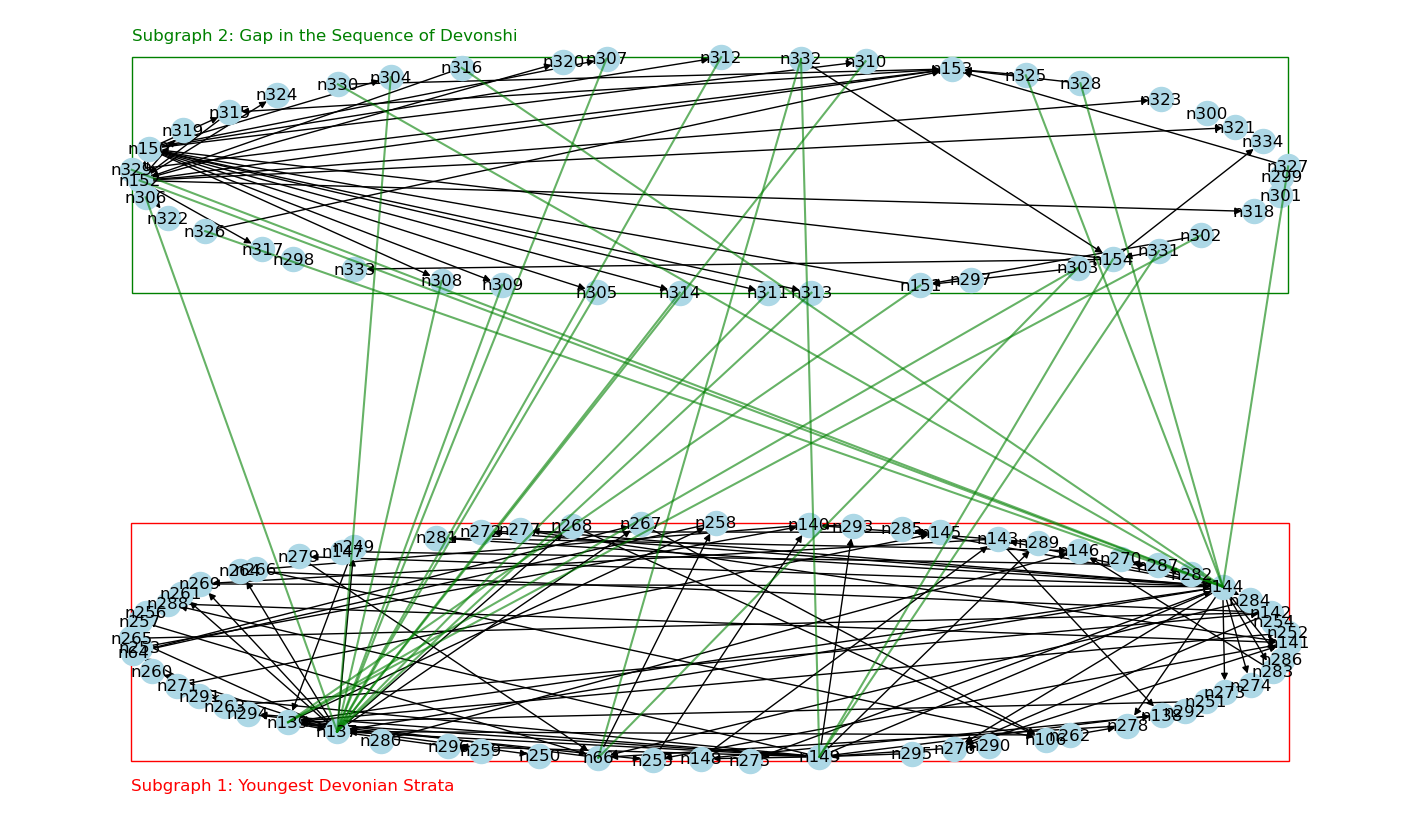

In [97]:
plt.figure(figsize=(14, 8))

# Draw the nodes and edges of the subgraphs
nx.draw(subgraph1, pos1, with_labels=True, node_size=300, node_color='lightblue', edge_color='black')
nx.draw(subgraph2, shifted_pos2, with_labels=True, node_size=300, node_color='lightblue', edge_color='black')

# Draw the bundled inter-cluster edges
for edge, control_points in result.items():
    # Extract the x and y coordinates of the control points
    x_coords, y_coords = zip(*control_points)
    
    # Draw a line through the control points
    plt.plot(x_coords, y_coords, color='green', alpha=0.6)

# bounding boxes for subgraph1
bbox1 = patches.Rectangle((min(x for x, y in pos1.values()), min(y for x, y in pos1.values())),
                          max(x for x, y in pos1.values()) - min(x for x, y in pos1.values()),
                          max(y for x, y in pos1.values()) - min(y for x, y in pos1.values()),
                          linewidth=1, edgecolor='red', facecolor='none')
plt.gca().add_patch(bbox1)


#bounding boxes for subgraph2
bbox2 = patches.Rectangle((min(x for x, y in shifted_pos2.values()), min(y for x, y in shifted_pos2.values())),
                          max(x for x, y in shifted_pos2.values()) - min(x for x, y in shifted_pos2.values()),
                          max(y for x, y in shifted_pos2.values()) - min(y for x, y in shifted_pos2.values()),
                          linewidth=1, edgecolor='green', facecolor='none')
plt.gca().add_patch(bbox2)

title_pos1 = (min(x for x, y in pos1.values()), min(y for x, y in pos1.values()) - 5)  # Below subgraph1
title_pos2 = (min(x for x, y in shifted_pos2.values()), max(y for x, y in shifted_pos2.values()) + 3)  # Above subgraph2

plt.text(title_pos1[0], title_pos1[1], 'Subgraph 1: Youngest Devonian Strata', fontsize=12, color='red')
plt.text(title_pos2[0], title_pos2[1], 'Subgraph 2: Gap in the Sequence of Devonshi', fontsize=12, color='green')

plt.axis('off')
plt.show()


In [134]:
#2

def edge_bundling(graph, n0, C, I, s, kP, compatibility_threshold):
    
    B = {edge: subdivide_edge(position, n0) for edge, position in graph.items()}

    
    edges = list(graph.keys())
    num_edges = len(edges)

    # Initialize iterations and cycles
    t = 0
    c = 1

    # Perform the bundling process
    while c < C:
        for i in range(1, n0 - 1):
            P_i = np.array([B[edge][i] for edge in edges])
            P_i_minus_1 = np.array([B[edge][i - 1] for edge in edges])
            P_i_plus_1 = np.array([B[edge][i + 1] for edge in edges])
            
            # Calculate spring forces
            F_spring = kP * (np.linalg.norm(P_i_minus_1 - P_i, axis=1) + np.linalg.norm(P_i - P_i_plus_1, axis=1))

            
            # Compute electrostatic forces
            F_electrostatic = np.zeros((num_edges, 2))
            for idx1, edge1 in enumerate(edges):
                for idx2, edge2 in enumerate(edges):
                    if edge1 != edge2:
                        # Vectorized computation of distances and compatibility
                        Q_j = np.array(B[edge2][i])
                        distance = np.linalg.norm(P_i[idx1] - Q_j)
                        if distance > 0:
                            compatibility_score = Ce((P_i_minus_1[idx1], P_i_plus_1[idx1]),
                                                     (B[edge2][i - 1], B[edge2][i + 1]))
                            # Check if the compatibility score exceeds the threshold
                            if compatibility_score > compatibility_threshold:
                            # Remove [0] as compatibility_score is expected to be a scalar
                                F_electrostatic[idx1] += (compatibility_score / distance**2) * (Q_j - P_i[idx1])


            # Update control point positions
            for idx, edge in enumerate(edges):
                B[edge][i] = tuple(np.array(B[edge][i]) + s * (F_spring[idx] + F_electrostatic[idx]))

        # Increment iteration counter
        t += 1
        if t >= I:
            # Reset iteration counter, increase cycle counter
            t = 0
            c += 1

            # Double the number of points, halve the step size
            n0 *= 2
            s /= 2

            # Re-subdivide each edge with the new number of points
            for edge, position in graph.items():
                B[edge] = subdivide_edge(position, n0)

    return B

C = 6  # number of cycles
I_0 = 50  # initial number of iterations
s = 0.04  # initial step size
n0 = 4  # initial number of subdivisions
kP = 0.1  # spring constant
compatibility_threshold = 0.1

result1 = edge_bundling(inter_cluster_edge_positions, n0, C, I_0, s, kP, compatibility_threshold)

In [135]:
result1

{('n66', 'n303'): [(-3.4343807599854586, -19.419623992375545),
  (-3.301024532813807, -18.757859795334884),
  (-3.1676683056421555, -18.096095598294223),
  (-3.0343120784705038, -17.43433140125356),
  (-2.9009558512988525, -16.772567204212898),
  (-2.7675996241272007, -16.110803007172237),
  (-2.6342433969555494, -15.449038810131574),
  (-2.5008871697838977, -14.787274613090911),
  (-2.3675309426122464, -14.12551041605025),
  (-2.2341747154405946, -13.46374621900959),
  (-2.100818488268943, -12.801982021968929),
  (-1.9674622610972916, -12.140217824928266),
  (-1.83410603392564, -11.478453627887603),
  (-1.7007498067539886, -10.816689430846942),
  (-1.567393579582337, -10.15492523380628),
  (-1.4340373524106855, -9.493161036765619),
  (-1.3006811252390338, -8.831396839724958),
  (-1.167324898067382, -8.169632642684293),
  (-1.0339686708957307, -7.507868445643634),
  (-0.900612443724079, -6.84610424860297),
  (-0.7672562165524277, -6.184340051562311),
  (-0.633899989380776, -5.522575854

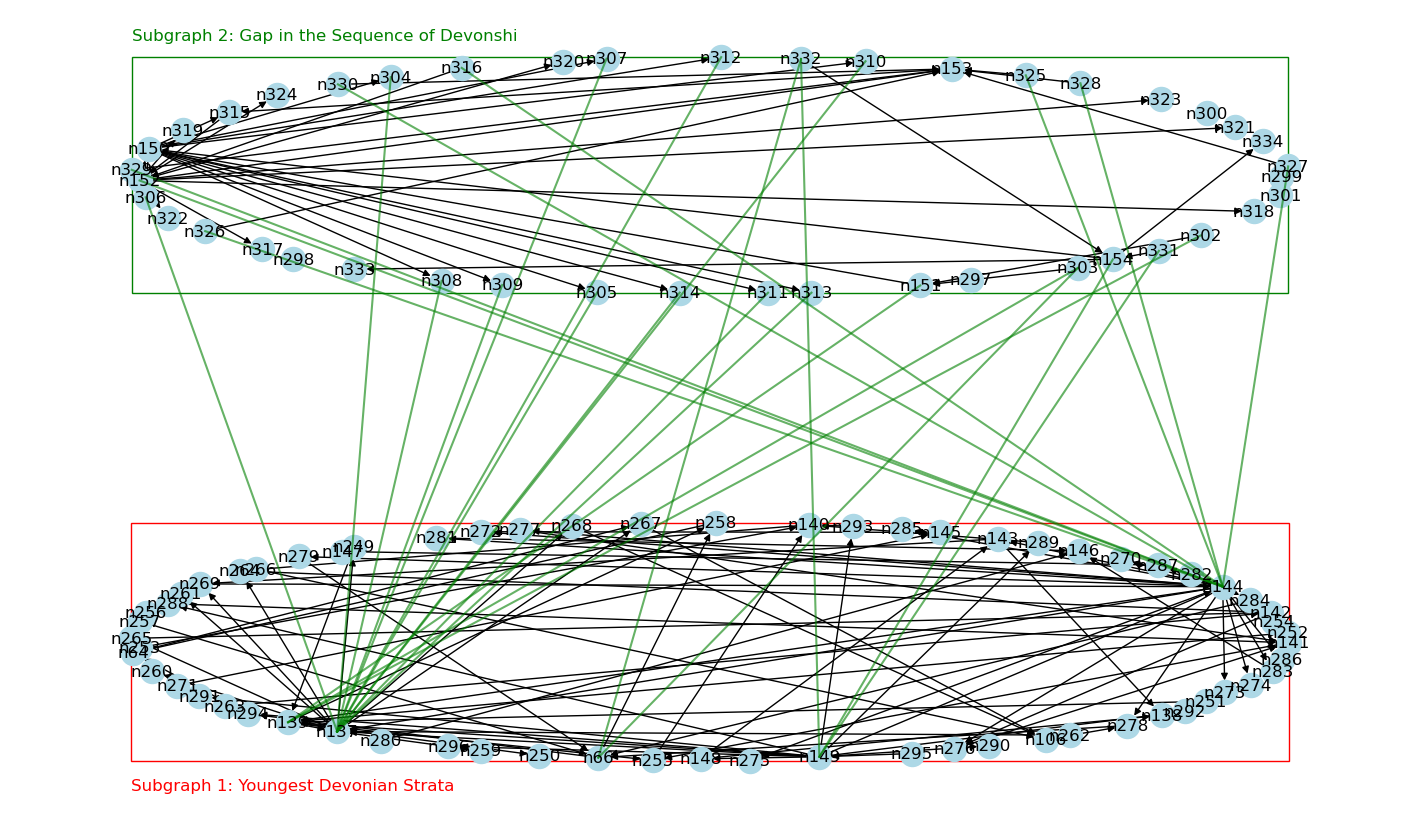

In [136]:
plt.figure(figsize=(14, 8))

# Draw the nodes and edges of the subgraphs
nx.draw(subgraph1, pos1, with_labels=True, node_size=300, node_color='lightblue', edge_color='black')
nx.draw(subgraph2, shifted_pos2, with_labels=True, node_size=300, node_color='lightblue', edge_color='black')

# Draw the bundled inter-cluster edges
for edge, control_points in result1.items():
    # Extract the x and y coordinates of the control points
    x_coords, y_coords = zip(*control_points)
    
    # Draw a line through the control points
    plt.plot(x_coords, y_coords, color='green', alpha=0.6)

# bounding boxes for subgraph1
bbox1 = patches.Rectangle((min(x for x, y in pos1.values()), min(y for x, y in pos1.values())),
                          max(x for x, y in pos1.values()) - min(x for x, y in pos1.values()),
                          max(y for x, y in pos1.values()) - min(y for x, y in pos1.values()),
                          linewidth=1, edgecolor='red', facecolor='none')
plt.gca().add_patch(bbox1)


#bounding boxes for subgraph2
bbox2 = patches.Rectangle((min(x for x, y in shifted_pos2.values()), min(y for x, y in shifted_pos2.values())),
                          max(x for x, y in shifted_pos2.values()) - min(x for x, y in shifted_pos2.values()),
                          max(y for x, y in shifted_pos2.values()) - min(y for x, y in shifted_pos2.values()),
                          linewidth=1, edgecolor='green', facecolor='none')
plt.gca().add_patch(bbox2)

title_pos1 = (min(x for x, y in pos1.values()), min(y for x, y in pos1.values()) - 5)  # Below subgraph1
title_pos2 = (min(x for x, y in shifted_pos2.values()), max(y for x, y in shifted_pos2.values()) + 3)  # Above subgraph2

plt.text(title_pos1[0], title_pos1[1], 'Subgraph 1: Youngest Devonian Strata', fontsize=12, color='red')
plt.text(title_pos2[0], title_pos2[1], 'Subgraph 2: Gap in the Sequence of Devonshi', fontsize=12, color='green')

plt.axis('off')
plt.show()


In [28]:
# def subdivide_edge(edge, n_points):
#     if n_points < 2:
#         n_points += 2
        
#     P0 = np.array(Graph.nodes[edge[0]]['pos'])
#     P1 = np.array(Graph.nodes[edge[1]]['pos'])
#     return [tuple(P0 + i/(n_points-1) * (P1 - P0)) for i in range(n_points)]

def apply_forces(B, E, n, kp, Ce):
    """
    Apply forces to points B and move them accordingly.

    Parameters:
    B (dict): A dictionary of points, where each point is a key and its value is its position.
    E (list): A list of edges, where each edge is a tuple of two points.
    n (int): The number of points on an edge.
    kp (float): A constant that determines the strength of the spring force.
    Ce (func): A function that calculates the edge compatibility.
    """

    # Initialize forces
    forces = {point: np.array([0.0, 0.0]) for point in B}

     # Apply spring forces
    for edge in E:
        subdivided_edge = subdivide_edge(edge, n)
        for i in range(1, len(subdivided_edge) - 1):
            forces[subdivided_edge[i]] += kp * (np.linalg.norm(B[subdivided_edge[i-1]] - B[subdivided_edge[i]]) + 
                                                 np.linalg.norm(B[subdivided_edge[i+1]] - B[subdivided_edge[i]]))

    # Apply electrostatic forces
    for edge in E:
        for i in range(1, len(edge) - 1):
            pi = edge[i]
            for other_edge in E:
                if edge != other_edge:
                    for j in range(1, len(other_edge) - 1):
                        pj = other_edge[j]
                        if pi != pj:  # Ignore self-forces
                            compatibility = Ce_function(B[pi], B[pj])
                            distance = np.linalg.norm(B[pi] - B[pj])
                            if distance > 0:  # Prevent division by zero
                                forces[pi] += compatibility * (B[pi] - B[pj]) / distance
                                
    # Update point positions
    for point in B:
        B[point] += forces[point]
    
    return B


def edge_bundling(G, edge_list, C, I_0, S_0, n_0, kp):
    B = {node: np.array(pos) for node, pos in nx.get_node_attributes(G, 'pos').items()}
    n = n_0
    
    for cycle in range(C):
        for edge in edge_list:
            B.update({point: B.get(point, np.array([0.0, 0.0])) for point in subdivide_edge(edge, n)})
        
        for _ in range(I_0):
            B = apply_forces(B, edge_list, n, kp, Ce)
        
        n *= 2  # Double the number of subdivision points
        S_0 /= 2  # Halve the step size

    # Convert B to the format required by the graph drawing function
    pos = {node: B[node].tolist() for node in B}
    return pos

# Example usage:

C = 6  # number of cycles
I_0 = 50  # initial number of iterations
S_0 = 0.04  # initial step size
n_0 = 1  # initial number of subdivisions
kp = 0.1  # spring constant

# Assume Graph and edge_list are already defined
bundled_layout = edge_bundling(Graph, edge_list, C, I_0, S_0, n_0, kp)


KeyError: 'pos'

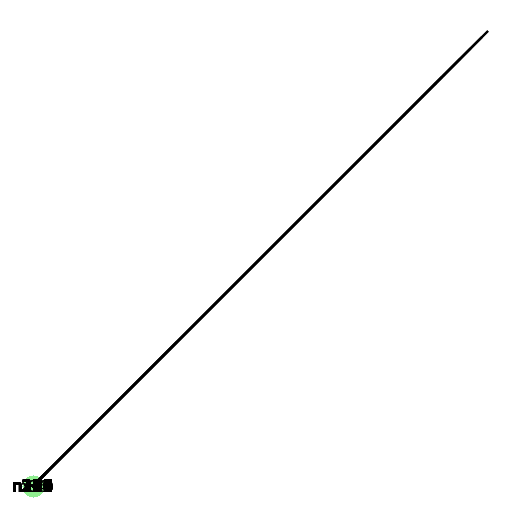

In [46]:
def bundle_edges(pos1, pos2, inter_cluster_edges, iterations=5, subdivisions=3, compatibility_threshold=0.6, k_p=0.1):
    # Initialize control points for edges
    control_points = {}
    for edge in inter_cluster_edges:
        points = []
        src, dst = edge
        src_pos, dst_pos = np.array(pos1.get(src, pos2.get(src))), np.array(pos2.get(dst, pos1.get(dst)))
        step = (dst_pos - src_pos) / (subdivisions + 1)
        for i in range(1, subdivisions + 1):
            points.append(src_pos + step * i)
        control_points[edge] = points

    # Main bundling loop
    for iteration in range(iterations):
        # Initialize forces
        forces = {edge: [np.zeros(2) for _ in range(subdivisions)] for edge in inter_cluster_edges}

        # Compute forces based on edge compatibility
        for edge_i in inter_cluster_edges:
            P = (pos1.get(edge_i[0], pos2.get(edge_i[0])), pos1.get(edge_i[1], pos2.get(edge_i[1])))
            for pi in range(subdivisions):
                p_i = control_points[edge_i][pi]
                for edge_j in inter_cluster_edges:
                    if edge_i != edge_j:
                        Q = (pos1.get(edge_j[0], pos2.get(edge_j[0])), pos1.get(edge_j[1], pos2.get(edge_j[1])))
                        for pj in range(subdivisions):
                            q_j = control_points[edge_j][pj]
                            if Ce(P, Q) > compatibility_threshold:
                                force = compute_force(P, Q, p_i, q_j, k_p)
                                forces[edge_i][pi] += force

        # Apply forces to control points
        for edge, points_forces in forces.items():
            for i in range(subdivisions):
                control_points[edge][i] += points_forces[i]

    return control_points

def compute_force(P, Q, p_i, q_j, k_p):
    """
    Calculate the force based on the overall force on point p_i of edge P due to point q_j of edge Q.

    Args:
    P (tuple): Start and end node of edge P.
    Q (tuple): Start and end node of edge Q.
    p_i (np.array): The position of the current control point on edge P.
    q_j (np.array): The position of the current control point on edge Q.
    k_p (float): Spring constant for edge P.

    Returns:
    np.array: The force vector to be applied on p_i.
    """
    # Spring force for edge P
    p_prev, p_next = np.array(P[0]), np.array(P[1])
    spring_force = k_p * (np.linalg.norm(p_prev - p_i) + np.linalg.norm(p_i - p_next))

    # Electrostatic-like force between p_i of P and q_j of Q
    electrostatic_force = Ce(P, Q) / np.linalg.norm(p_i - q_j)

    # Sum the forces
    force = spring_force + electrostatic_force

    return force


def draw_bundled_graph(G, pos1, pos2, control_points):
    plt.figure(figsize=(5, 5))

    # Draw subgraphs
    nx.draw(G.subgraph(cluster1_nodes), pos1, with_labels=True, node_size=200, node_color='lightblue')
    nx.draw(G.subgraph(cluster2_nodes), pos2, with_labels=True, node_size=200, node_color='lightgreen')

    # Draw edges with control points
    for edge, points in control_points.items():
        full_edge = [pos1.get(edge[0], pos2.get(edge[0]))] + points + [pos2.get(edge[1], pos1.get(edge[1]))]
        for i in range(len(full_edge) - 1):
            plt.plot([full_edge[i][0], full_edge[i+1][0]], [full_edge[i][1], full_edge[i+1][1]], color='black')

    plt.show()
    
control_points = bundle_edges(pos1, pos2, inter_cluster_edges, k_p=0.1)
draw_bundled_graph(Graph, pos1, pos2, control_points)

In [47]:
def subdivide_edges(edges, n_subdivisions):
    subdivided_edges = defaultdict(list)
    for edge in edges:
        p0, p1 = edge
        subdivided_edges[edge].append(p0)  # Starting point
        for i in range(1, n_subdivisions):
            # Compute the intermediate subdivision points
            subdivided_edges[edge].append(
                p0 + (p1 - p0) * i / float(n_subdivisions)
            )
        subdivided_edges[edge].append(p1)  # Ending point
    return subdivided_edges

def compute_spring_forces(subdivided_edges, kP):
    forces = defaultdict(lambda: np.zeros(2))
    for edge, control_points in subdivided_edges.items():
        for i in range(1, len(control_points) - 1):
            prev_point = control_points[i - 1]
            next_point = control_points[i + 1]
            current_point = control_points[i]
            # The spring force formula
            forces[edge][i] += kP * (prev_point - current_point)
            forces[edge][i] += kP * (next_point - current_point)
    return forces

def compute_electrostatic_forces(subdivided_edges, compatibility_matrix):
    forces = defaultdict(lambda: np.zeros(2))
    for edge_p, control_points_p in subdivided_edges.items():
        for edge_q, control_points_q in subdivided_edges.items():
            if edge_p == edge_q:
                continue # Skip self
    compatibility_score = compatibility_matrix[edge_p][edge_q]
    if compatibility_score < lambda_threshold:
        continue # Skip non-compatible edges
    for i, pi in enumerate(control_points_p):
        for j, qj in enumerate(control_points_q):
            if i == j: # Corresponding control points
            delta = qj - pi
            distance = np.linalg.norm(delta)
        if distance > 0: # Avoid division by zero
            # Electrostatic force calculation
        forces[edge_p][i] += (compatibility_score / distance ** 2) * delta
    return forces

n_subdivisions = 4
K = 0.1  # Stiffness constant

# Suppose we have a function to calculate a compatibility matrix
# compatibility_matrix = compute_compatibility_matrix(graph_edges)

# Initialize subdivided edges
subdivided_edges = subdivide_edges(graph.edges(), n_subdivisions)

# Main loop for force-directed edge bundling
for cycle in range(C):
    for iteration in range(I0):
        # Compute spring forces
        spring_forces = compute_spring_forces(subdivided_edges, K)

        # Compute electrostatic forces
        electrostatic_forces = compute_electrostatic_forces(subdivided_edges, compatibility_matrix)

        # Apply forces to subdivision points
        for edge, control_points in subdivided_edges.items():
            for i in range(1, len(control_points) - 1):
                total_force = spring_forces[edge][i] + electrostatic_forces[edge][i]
                control_points[i] += s0 * total_force

        # Other operations like cooling the system can be added here

    # After each cycle, subdivide more and cool the system
    n_subdivisions *= 2
    s0 *= 0.5
    
    
import matplotlib.pyplot as plt

# Draw graph nodes
pos = nx.spring_layout(graph)  # Use any layout that you have computed before
nx.draw_networkx_nodes(graph, pos)

# Draw edges using Bezier curves
for edge, control_points in subdivided_edges.items():
    bezier = Bezier(control_points)
    curve_points = bezier.get_points(100)  # Get 100 points along the curve for smoothness
    plt.plot(curve_points[:, 0], curve_points[:, 1], color='black')  # Adjust color as needed

# Display the graph
plt.axis('off')
plt.show()

IndentationError: expected an indented block (751405154.py, line 38)